## (1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand  경로에 train.csv  데이터를 train 변수로 가져 옵니다.

In [1]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime  활용
pandas datetime extract year month day 키워드로 검색해 보기

In [2]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
train["datetime"]= pd.to_datetime(train["datetime"])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
#train['minute'] = train['datetime'].dt.minute
#train['second'] = train['datetime'].dt.second

In [4]:
#train.head()
train.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
10881  19.695        50    26.0027       7         329    336  2012     12   
10882  17.425        57    15.0013      10         231    241  2012     12   
10883  15.910        61    15.0013       4         164    168  2012     12   
10884  17.425        61     6.0032      12         117    129  2012     12   
10885  16.665        66     8.9981       4          84     88  2012     12   

       day  hour  minute  second  
10881   19    19       0       0  
10882   19    20       0       0  
10883   19    21       0       0  
10884   19    22       0       0  
10885   19    23       0       0

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot  활용해서 시각화하기
subplot 을 활용해서 한 번에 6개의 그래프 함께 시각화하기

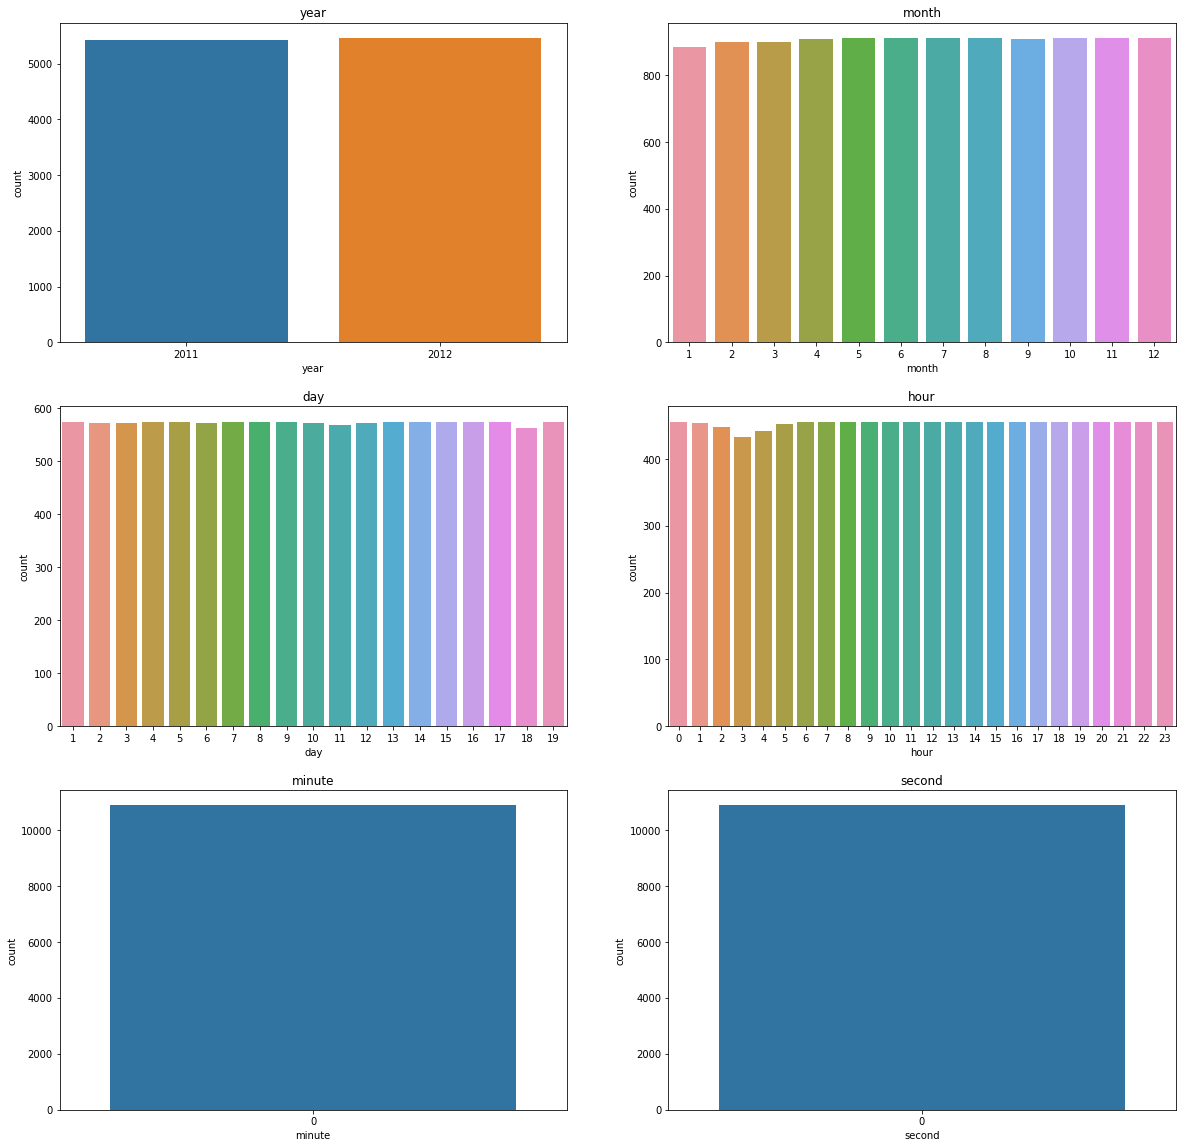

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 20))


plt.subplot(321)
sns.countplot(x="year",data=train)
plt.title('year')

plt.subplot(322)
sns.countplot(x="month",data=train)
plt.title('month')

plt.subplot(323)
sns.countplot(x="day",data=train)
plt.title('day')

plt.subplot(324)
sns.countplot(x="hour",data=train)
plt.title('hour')

plt.subplot(325)
sns.countplot(x="minute",data=train)
plt.title('minute')

plt.subplot(326)
sns.countplot(x="second",data=train)
plt.title('second')

plt.show()

## (4) X, y 컬럼 선택 및 train/test 데이터 분리
X (feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
count  값을 맞추고자 하므로, y  변수에 count  컬럼의 데이터 넣기

In [6]:
#시간대,요일,계절,온도,습도
print(train.columns)
df_x = train[['season', 'holiday','workingday','temp','humidity','windspeed','year', 'month','day']]
df_y = train['count']

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


In [7]:
df_x.head()

season  holiday  workingday  temp  humidity  windspeed  year  month  day
0       1        0           0  9.84        81        0.0  2011      1    1
1       1        0           0  9.02        80        0.0  2011      1    1
2       1        0           0  9.02        80        0.0  2011      1    1
3       1        0           0  9.84        75        0.0  2011      1    1
4       1        0           0  9.84        75        0.0  2011      1    1

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=40)

## (5) LinearRegression 모델 학습
sklearn 의 LinearRegression  모델 불러오기 및 학습하기

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([139.26122481, 297.64076735, 229.17855426, ..., 236.64753169,
        57.56450017, 119.30593926])

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test 를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기

In [10]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("mse: ", mse)
print("rmse: ", rmse)

mse:  22474.492549622664
rmse:  149.91495105433168


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp  데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity  데이터를, y축에는 count 데이터를 넣어서 시각화하기

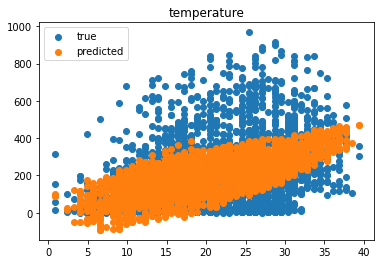

In [11]:
#import matplotlib.pyplot as plt

plt.title('temperature')
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="predicted")
plt.legend()
plt.show()

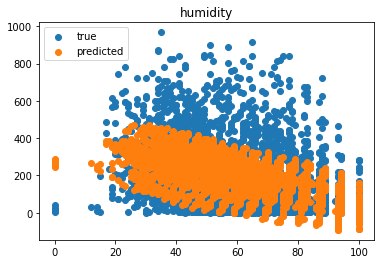

In [12]:
plt.title('humidity')
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="predicted")
plt.legend()
plt.show()

회고
- 배운점 : 개념으로 익혔던 내용들을 실습을 통해 어떻게 사용될 수 있는지 직접적으로 배울 수 있게 되었습니다.
- 아쉬운점 : 아직 혼자서 완벽하게 코드를 짜지는 못하는 점이 아쉬웠습니다.
- 느낀점 : 같은 팀원들과 함께 소통하면서 코드를 작성해내갈 수 있어서 좋았고 모르는 부분도 함께 해결해 나갈 수 있어 좋았습니다.